<a href="https://colab.research.google.com/github/Jahnavi2005s/ML-PROJECT-/blob/main/handwrittentxt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
dataset = pd.read_csv("/content/train.csv")

In [9]:
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


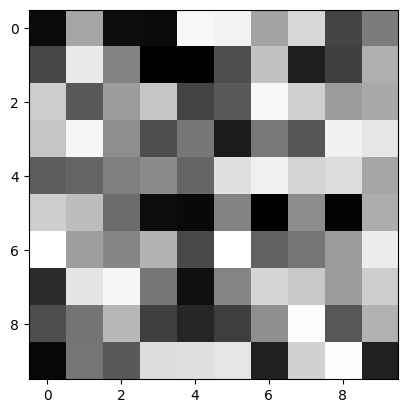

In [10]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [11]:
data = dataset.values[:5000]
data.shape

(571, 785)

In [12]:
X, y = data[:,1:], data[:, 0]

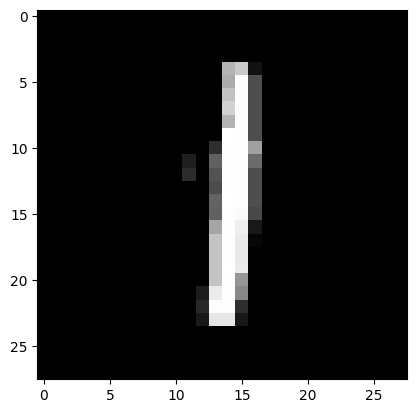

In [14]:
# Plotting digit
im = X[497].reshape((28,28)) # Changed index from 4997 to 497, which is within the bounds of X
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [15]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(456, 784) (456,)
(115, 784) (115,)
[1. 0. 1. 4. 0. 0. 7. 3. 5. 3. 8. 9. 1. 3. 3. 1. 2. 0. 7. 5. 8. 6. 2. 0.
 2. 3. 6. 9. 9. 7. 8. 9. 4. 9. 2. 1. 3. 1. 1. 4. 9. 1. 4. 4. 2. 6. 3. 7.
 7. 4. 7. 5. 1. 9. 0. 2. 2. 3. 9. 1. 1. 1. 5. 0. 6. 3. 4. 8. 1. 0. 3. 9.
 6. 2. 6. 4. 7. 1. 4. 1. 5. 4. 8. 9. 2. 9. 9. 8. 9. 6. 3. 6. 4. 6. 2. 9.
 1. 2. 0. 5. 9. 2. 7. 7. 2. 8. 8. 5. 0. 6. 0. 0. 2. 9. 0. 4. 7. 7. 1. 5.
 7. 9. 4. 6. 1. 5. 7. 6. 5. 0. 4. 8. 7. 6. 1. 8. 7. 3. 7. 3. 1. 0. 3. 4.
 5. 4. 0. 5. 4. 0. 3. 5. 1. 0. 8. 3. 7. 0. 9. 6. 6. 9. 5. 4. 6. 9. 3. 5.
 4. 2. 4. 8. 7. 7. 5. 8. 8. 8. 2. 6. 9. 3. 1. 0. 4. 1. 5. 9. 0. 6. 2. 1.
 3. 0. 6. 0. 0. 8. 3. 2. 0. 0. 6. 0. 0. 4. 7. 2. 7. 1. 9. 9. 3. 9. 8. 4.
 6. 6. 5. 3. 8. 1. 8. 7. 1. 3. 7. 6. 3. 6. 3. 6. 3. 2. 3. 2. 2. 7. 9. 2.
 3. 2. 7. 5. 5. 8. 8. 2. 0. 1. 4. 0. 6. 3. 7. 1. 1. 1. 4. 7. 0. 2. 9. 2.
 0. 5. 6. 0. 8. 9. 6. 2. 0. 0. 7. 2. 0. 4. 2. 0. 9. 1. 6. 9. 3. 0. 0. 2.
 0. 6. 8. 4. 0. 7. 2. 1. 9. 5. 2. 4. 8. 5. 2. 9. 7. 9. 2. 9. 7. 4. 9. 3.
 2. 7. 3. 6. 3.

In [16]:
def knn(X_train, y_train, test_point, k=3):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [17]:
def knn(X_train, y_train, test_point, k=5):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [18]:
def knn(X_train, y_train, test_point, k=7):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [19]:
def knn(X_train, y_train, test_point, k=9):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [20]:
def knn(X_train, y_train, test_point, k=11):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [21]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

np.float64(5.196152422706632)

In [22]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=3):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [23]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [24]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=7):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [25]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=9):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [26]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=11):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [27]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=3)

np.float64(0.7652173913043478)

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

In [28]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

np.float64(0.7478260869565218)

In [29]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=9)

np.float64(0.7304347826086957)

In [30]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=11)

np.float64(0.7391304347826086)

In [31]:

test_df = pd.read_csv("/content/test.csv")

In [32]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 785)

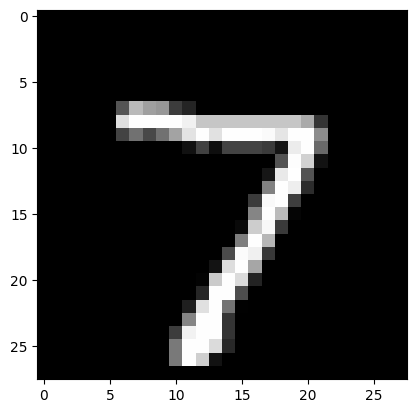

Label: 7.0


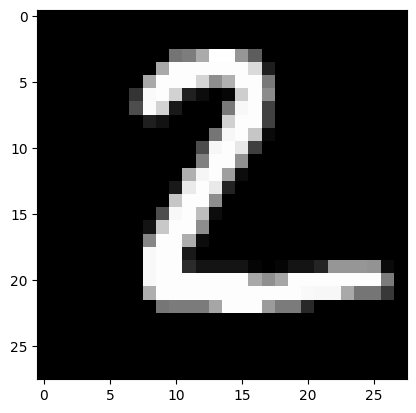

Label: 2.0


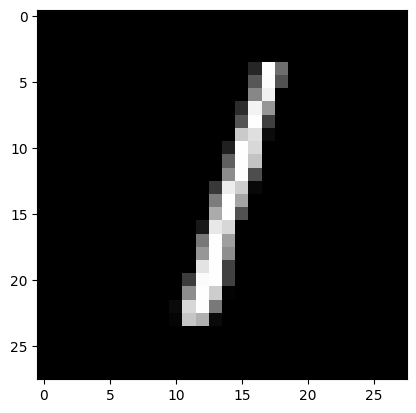

Label: 1.0


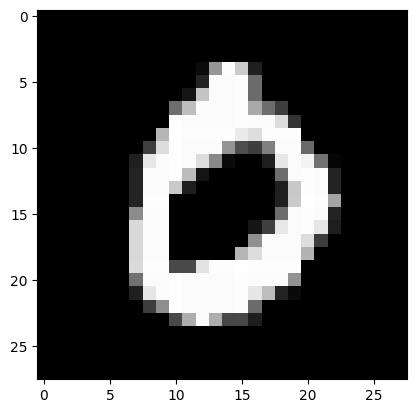

Label: 0.0


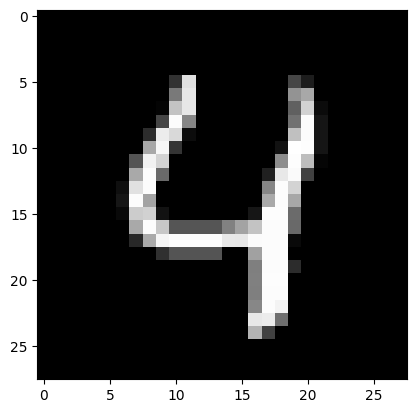

Label: 4.0


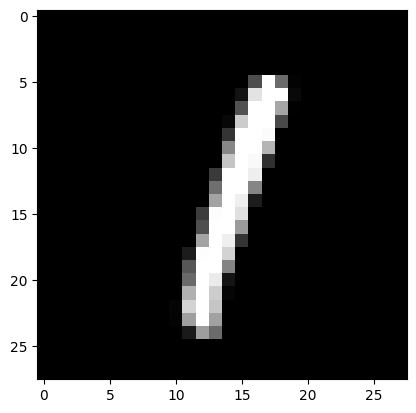

Label: 1.0


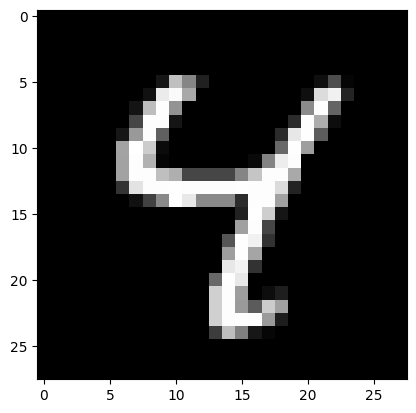

Label: 9.0


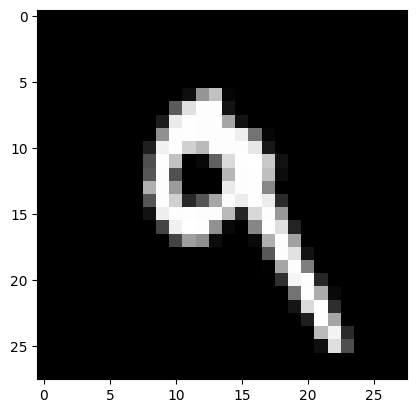

Label: 9.0


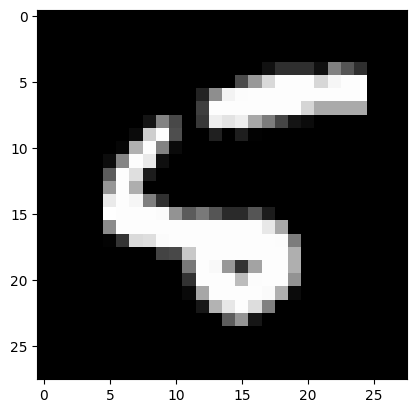

Label: 4.0


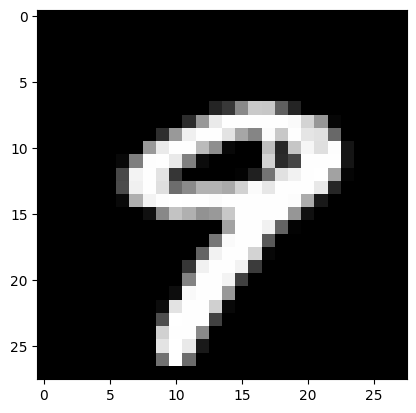

Label: 9.0


In [34]:
for test in test_images:
    # Assuming the extra column is the first one, slice the array to remove it
    im = test[1:].reshape((28,28))  # Reshape from the second element onwards
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test[1:])) # Pass the sliced array to knn as well